In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [53]:
class stock(object):
    def __init__(self,symbol,from_date,to_date):
        self.raw_data = data.DataReader(symbol,'yahoo',from_date,to_date)
        self.ret = np.array(self.raw_data['Close'].pct_change()[1:].tolist())
    def compute_alpha_beta(self,benchmark_index):
        benchmark_index_ret = np.array(benchmark_index).reshape(len(benchmark_index),1)
        target_ret = self.ret.reshape(len(self.ret),1)
        reg = LinearRegression()
        reg.fit(X=benchmark_index_ret,y=target_ret)
        self.beta = reg.coef_[0,0]
        self.alpha = reg.intercept_[0]

In [54]:
from_date = '2016-01-01'
to_date = '2016-03-01'
symbols = ['AAPL','GOOG','AMZN','FB','MSFT']
nasdaq_index_ret = np.array(data.DataReader('^IXIC','yahoo',from_date,to_date)['Close'].pct_change()[1:].tolist())
stocks = {}
for symbol in symbols:
    s = stock(symbol=symbol,from_date=from_date,to_date=to_date)
    s.compute_alpha_beta(nasdaq_index_ret)
    stocks[symbol] = s

for symbol in stocks:
    print symbol,stocks[symbol].beta,stocks[symbol].alpha

GOOG 0.84230510258 0.0002274846952
FB 1.33087430945 0.00372199236462
AAPL 1.11827854765 0.000175405891172
AMZN 1.19775297975 -0.000732337639302
MSFT 1.13222667795 0.000291978963606


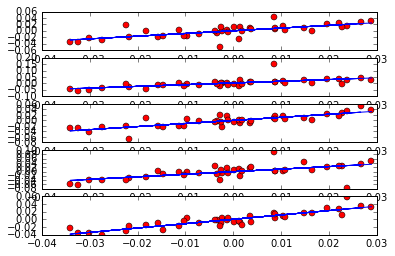

In [55]:
f,axs = plt.subplots(len(stocks),1)
for i,symbol in zip(range(len(axs)),stocks.keys()):
    axs[i].plot(nasdaq_index_ret,stocks[symbol].ret,'ro')
    axs[i].plot(nasdaq_index_ret,nasdaq_index_ret*stocks[symbol].beta + stocks[symbol].alpha)

In [56]:
rets = []
for symbol in stocks:
    rets.append(stocks[symbol].ret)
print np.corrcoef(rets)

[[ 1.          0.79152056  0.53108583  0.64006341  0.66971783]
 [ 0.79152056  1.          0.48431914  0.71623835  0.63540656]
 [ 0.53108583  0.48431914  1.          0.44183944  0.75986704]
 [ 0.64006341  0.71623835  0.44183944  1.          0.46907623]
 [ 0.66971783  0.63540656  0.75986704  0.46907623  1.        ]]
